# LOS ANGELES CRIME ANALYSIS:

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.plotly as py
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use("ggplot")
%matplotlib inline

### Read the csv file and do the cleaning:
- Drop unnecessary columns
- Create a separate data frame fo victim sex and victim age
- Drop null values
- Convert the date to datetime format

In [8]:
#read the csv file and cleaning the file

df = pd.read_csv("Crime_Data_2010_2017.csv")
cols = ["MO Codes","Victim Descent","Weapon Used Code","Weapon Description","Status Code","Crime Code 1",
       "Crime Code 2","Crime Code 3","Crime Code 4","Address","Cross Street","Premise Code", "Area ID", "DR Number"]
df.drop(cols, axis=1, inplace=True)
victim = df[['Victim Age', 'Victim Sex']]
victim = victim[victim["Victim Sex"] != 'H']
victim = victim[victim["Victim Sex"] != 'X']
victim = victim[victim["Victim Sex"] != '-']
df.dropna(inplace=True)
df.reset_index(inplace = True)

In [9]:
#convert date into datetime format

df["Date Reported"] = pd.to_datetime(df["Date Reported"], infer_datetime_format=True)
df["Date Occurred"] = pd.to_datetime(df["Date Occurred"], infer_datetime_format=True)
df = df.iloc[:,1:]

### Data Cleaning: 
- Function to convert the time into military time
- Another function to return the hour of crime
- Create a separate column in the dataframe for the hour when the crime ocurred
- Create columns for Year, Month and the day of the crime
- Drop unnecessary values from the Victim Sex column

In [10]:
#function to convert the time into military time and also return the hour of the crime.

def militarytime(time):
    mtime = ""
    if len(str(time)) == 1:
        mtime = "000" + str(time)
    if len(str(time)) == 2:
        mtime = "00" + str(time)
    if len(str(time)) == 3:
        mtime = "0" + str(time)
    if len(str(time)) == 4:
        mtime = str(time)
    return mtime

def hourtime(miltime):
    return miltime[:2]

In [11]:
#create new columns for "Time occurred" and "Hour Occurred".

df["Time Occurred"] = df["Time Occurred"].apply(militarytime)
df["Hour Occurred"] = df["Time Occurred"].apply(hourtime)

df = df[df["Victim Sex"] != 'H']
df = df[df["Victim Sex"] != 'X']
df = df[df["Victim Sex"] != '-']

In [12]:
#create new columns for "Year", "Month", and "Weekday" of the crime.

df["Year"] = df["Date Occurred"].dt.year
df["Month"] =df["Date Occurred"].dt.month
df["Week_day"] = df["Date Occurred"].dt.weekday_name

In [13]:
df.head(7)

,Date Reported,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code,Crime Code Description,Victim Age,Victim Sex,Premise Description,Status Description,Location,Hour Occurred,Year,Month,Week_day
0,2013-03-14,2013-03-11,1800,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Adult Other,"(33.9829, -118.3338)",18,2013,3,Monday
1,2014-01-11,2014-01-04,2300,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),84.0,M,SINGLE FAMILY DWELLING,Invest Cont,"(34.2009, -118.6369)",23,2014,1,Saturday
2,2013-01-08,2013-01-08,1400,Central,111,110,CRIMINAL HOMICIDE,49.0,F,SINGLE FAMILY DWELLING,Adult Arrest,"(34.0591, -118.2412)",14,2013,1,Tuesday
3,2013-03-29,2013-01-15,0800,Van Nuys,904,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",27.0,F,OTHER BUSINESS,Invest Cont,"(34.2012, -118.4662)",08,2013,1,Tuesday
4,2013-02-22,2013-02-13,1200,77th Street,1266,440,THEFT PLAIN - PETTY ($950 & UNDER),42.0,M,PARKING LOT,Invest Cont,"(33.9651, -118.2783)",12,2013,2,Wednesday
5,2013-06-20,2013-06-07,1200,77th Street,1268,763,STALKING,29.0,M,STREET,Adult Other,"(33.9651, -118.2754)",12,2013,6,Friday
6,2013-01-06,2013-01-06,2030,N Hollywood,1511,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),12.0,M,DEPARTMENT STORE,Invest Cont,"(34.2012, -118.416)",20,2013,1,Sunday


### Total number of crimes by year (2010-2017)

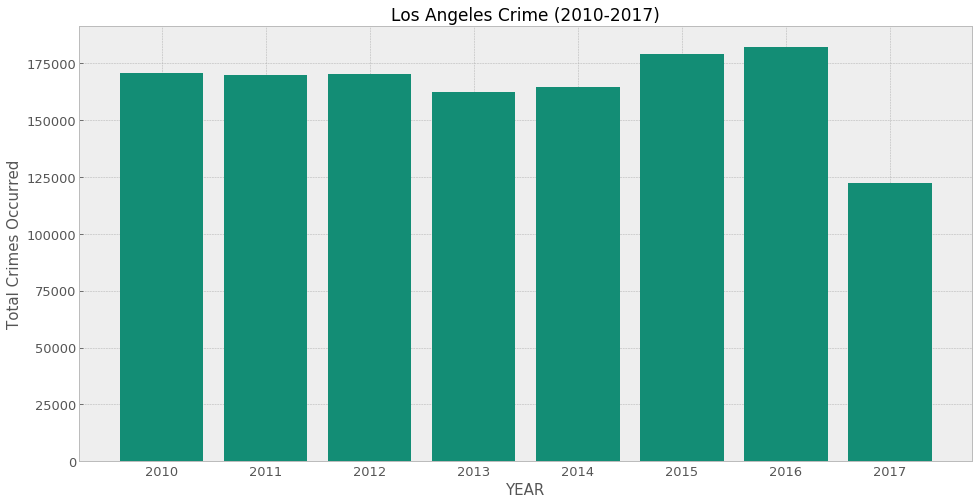

In [25]:
CrimesByYear = df.groupby("Year").count().iloc[:,:2]
plt.figure(figsize=(16,8))
ticks = CrimesByYear.index
plt.bar(CrimesByYear.index,CrimesByYear["Date Occurred"], color = "#138D75")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("YEAR", fontsize = 15)
plt.ylabel("Total Crimes Occurred", fontsize=15)
plt.title("Los Angeles Crime (2010-2017)", fontsize = 17)
plt.savefig("year-wise crime.png",bbox_inches='tight')
plt.show()

### Total number of crimes by month 

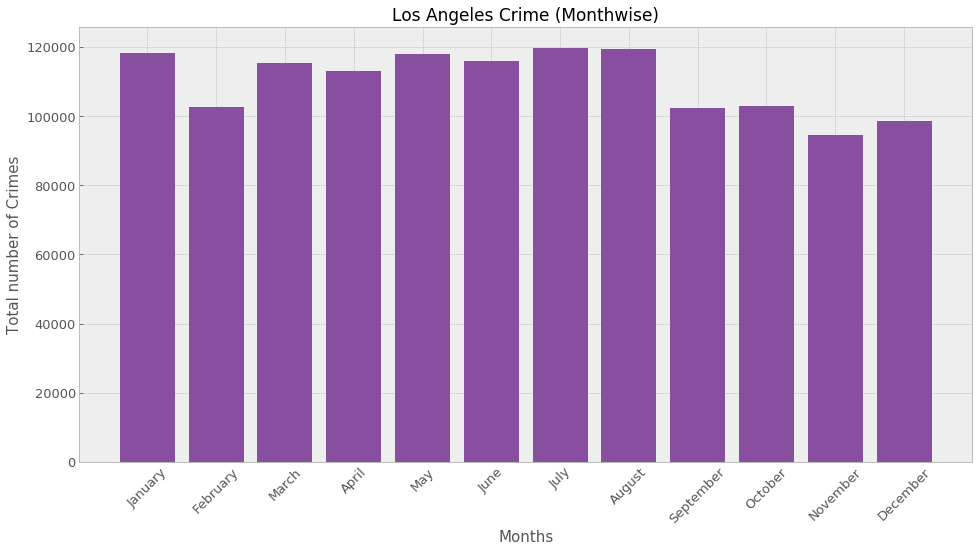

In [26]:
CrimeByMonth = df.groupby("Month").count().iloc[:,1:2]
plt.figure(figsize=(16,8))
xtick = CrimeByMonth.index
label = ["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.bar(CrimeByMonth.index,CrimeByMonth['Date Occurred'], color="#884EA0")
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Total number of Crimes", fontsize = 15)
plt.title("Los Angeles Crime (Monthwise)", fontsize=17)
plt.xticks(xtick, label, rotation = 45, fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("Monthwise crime.png",bbox_inches='tight')
plt.show()

### Regionwise number of crimes in year 2010 and 2017:
    - Total of 21 regions in Los Angeles
    - 77th Street and Southwest region in Los Angeles had the most number of crimes from year 2010 to 2017

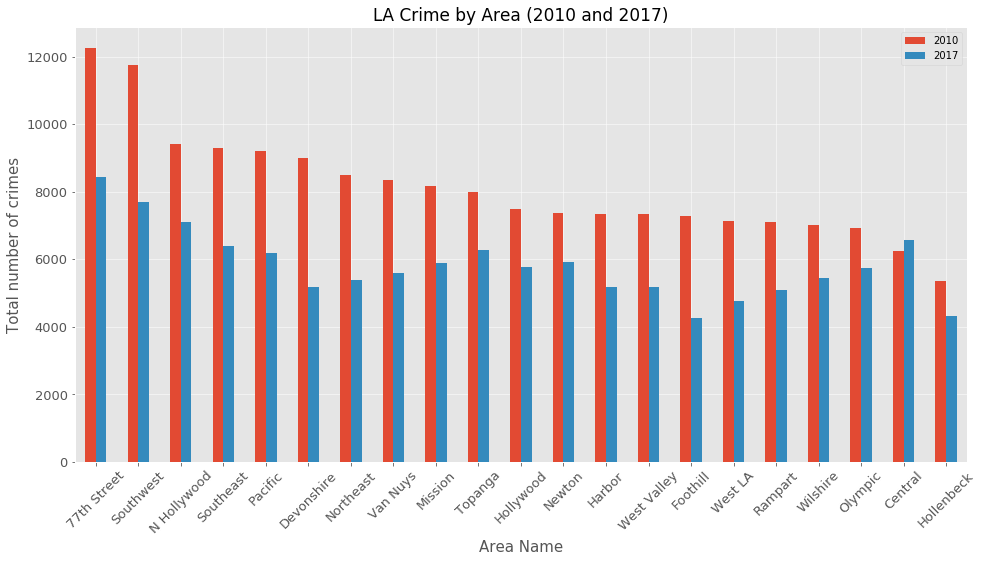

In [27]:
plt.style.use("ggplot")
CrimeByRegion = pd.DataFrame(df.groupby(["Area Name", "Year"]).count().iloc[:,1:2].unstack())
CrimeByRegion.columns = CrimeByRegion.columns.droplevel(0)
column = ["2010","2011","2012","2013","2014","2015","2016","2017"]
CrimeByRegion.columns = column
CrimeByRegion.sort_values(by="2010", ascending=False, inplace=True)
CrimeByRegion[["2010", "2017"]].plot(kind = 'bar', figsize = (16,8), rot = 45, sort_columns =True)
plt.xlabel("Area Name", fontsize = 15)
plt.ylabel("Total number of crimes", fontsize = 15)
plt.title("LA Crime by Area (2010 and 2017)", fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.savefig("Areawise Crime.png",bbox_inches='tight')
plt.show()

### Percent change in the crime rate in every area from year 2010 to 2017:
    - Devonshire and Foothill areas are the safest areas to live in Los Angeles
    - Central Area of Los Angeles has experienced increase in crime rate

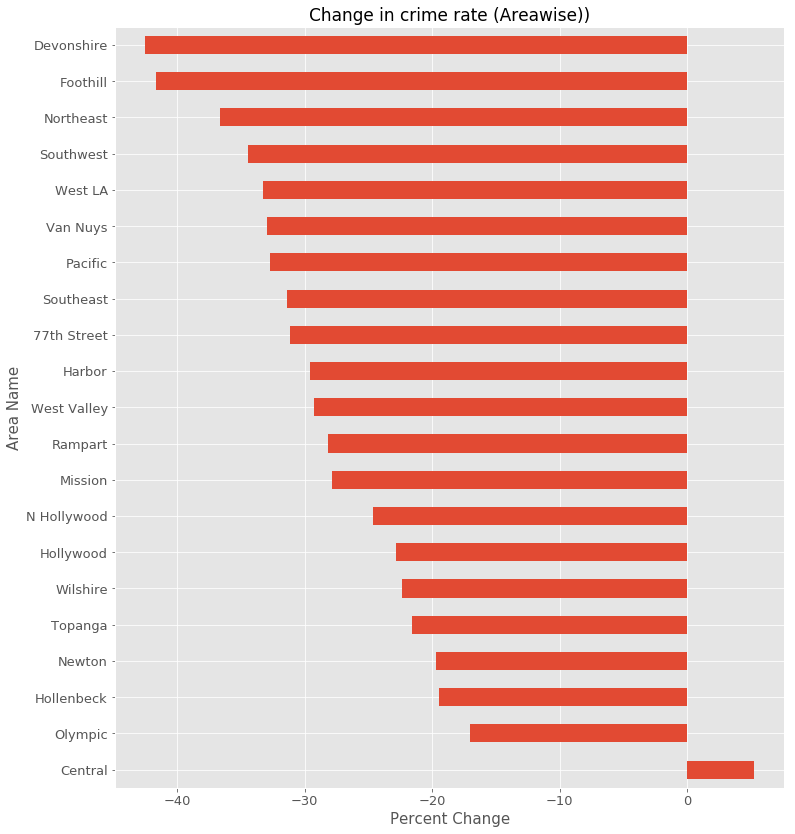

In [17]:
CrimeByRegion["per_change"] = ((CrimeByRegion["2017"]-CrimeByRegion["2010"])/CrimeByRegion["2010"]) * 100
CrimeByRegion.sort_values(by = "per_change", ascending=True, inplace=True)
CrimeByRegion["per_change"].plot(kind = 'barh', figsize = (12,14)).invert_yaxis()
plt.xlabel("Percent Change", fontsize = 15)
plt.ylabel("Area Name", fontsize = 15)
plt.title("Change in crime rate (Areawise))", fontsize = 17)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.show()

### Top 10 crimes in Los Angeles in past 8 years:
    - Simple Assault and Burglary from vehicle are the most common crimes in Los Angeles.

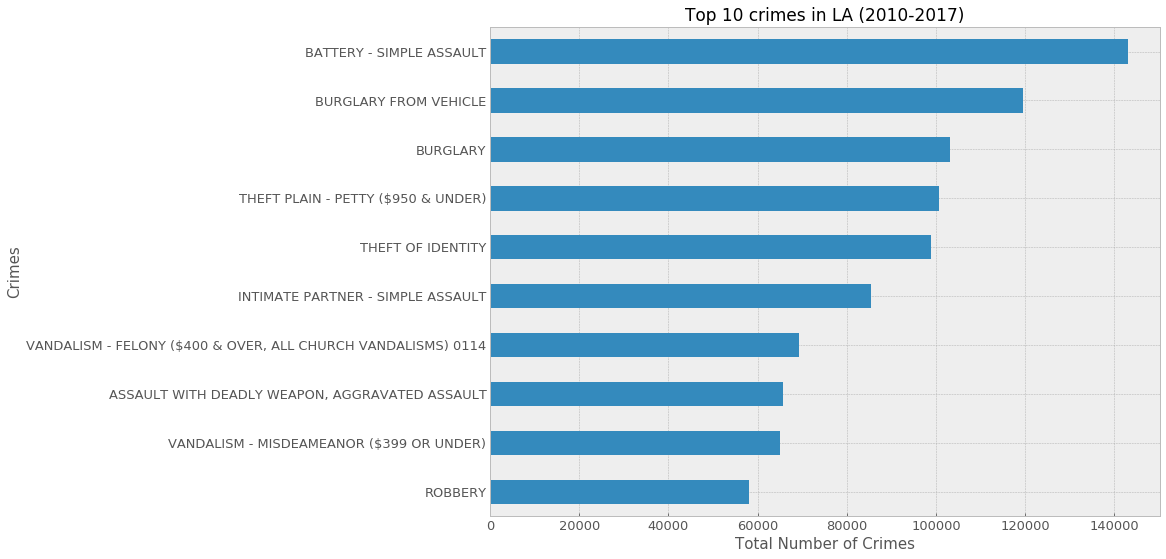

In [18]:
plt.style.use('bmh')
top10_crimes = df["Crime Code Description"].value_counts()[:10]
top10_crimes.plot(kind = 'barh', figsize=(12,9)).invert_yaxis()
plt.title("Top 10 crimes in LA (2010-2017)", fontsize =17)
plt.ylabel("Crimes", fontsize=15)
plt.xlabel("Total Number of Crimes", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("Top_10_crimes.png",bbox_inches='tight')
plt.show()

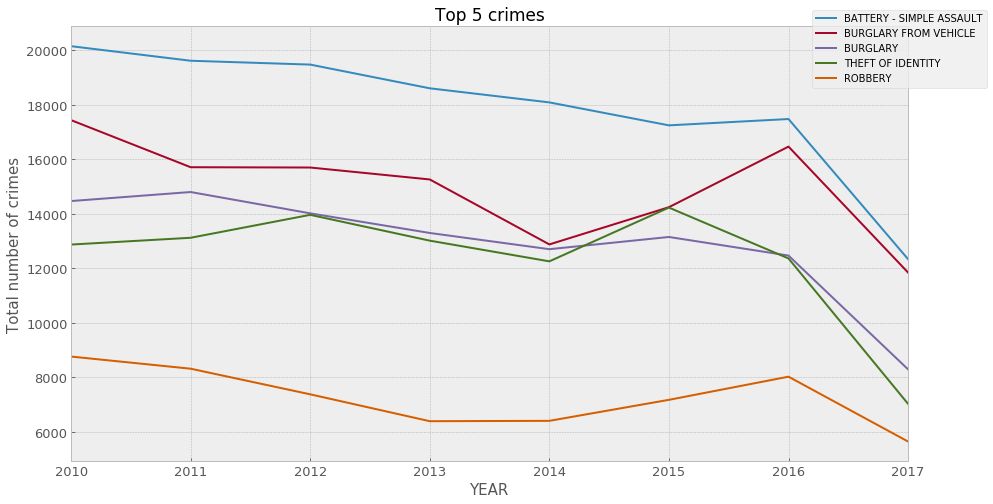

In [19]:
crimes = df.groupby(["Crime Code Description", "Year"]).count().iloc[:,1:2]
crimes = crimes.unstack()
crimes.columns = crimes.columns.droplevel(0)
crimes = crimes.T
top_10 = ["BATTERY - SIMPLE ASSAULT","BURGLARY FROM VEHICLE","BURGLARY","THEFT OF IDENTITY","ROBBERY"]
crimes[top_10].plot(figsize = (15,8))
plt.title("Top 5 crimes", fontsize=17)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("YEAR", fontsize=15)
plt.ylabel("Total number of crimes",fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


### Does the sex of a victim matter?
    - According to the bar graph below, male victims are more than the female victims.

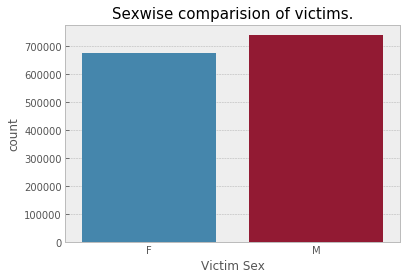

In [20]:
plt.style.use("bmh")
sns.countplot("Victim Sex", data=victim)
plt.title("Sexwise comparision of victims.", fontsize=15)
plt.savefig("victim_sex.png",bbox_inches='tight')
plt.show()

### Is there any particular age group that is targeted the most?
    - From the histogram below, it turns out that people between the age group of 20 years to 40 years are targetted the 
    most.

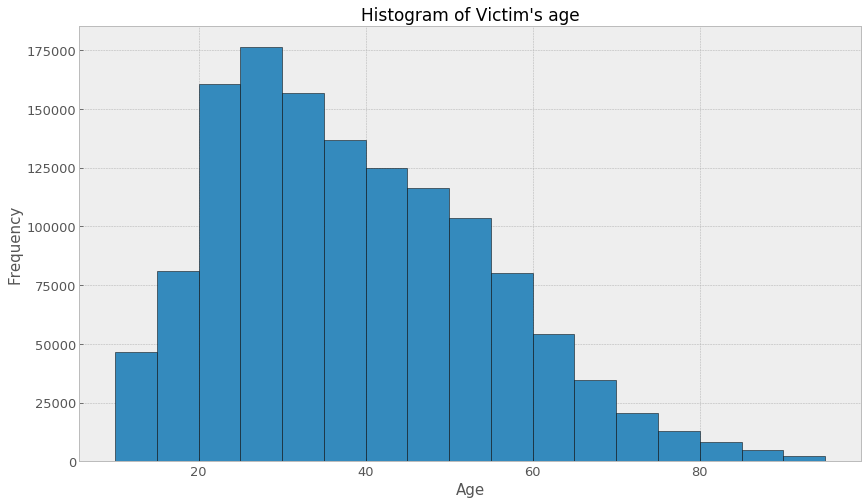

In [21]:
plt.figure(figsize=(14,8))
bins = np.arange(df['Victim Age'].min(), df['Victim Age'].max(), 5)
plt.hist(df["Victim Age"], bins=bins, alpha=1, edgecolor='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Histogram of Victim's age", fontsize=17)
plt.savefig("histogram.png",bbox_inches='tight')
plt.show()

### Is there any difference in the victim's sex in the age group of 20-40 years?
    - From the bar graph below, females in the age group of 20-40 years are targetted the most.

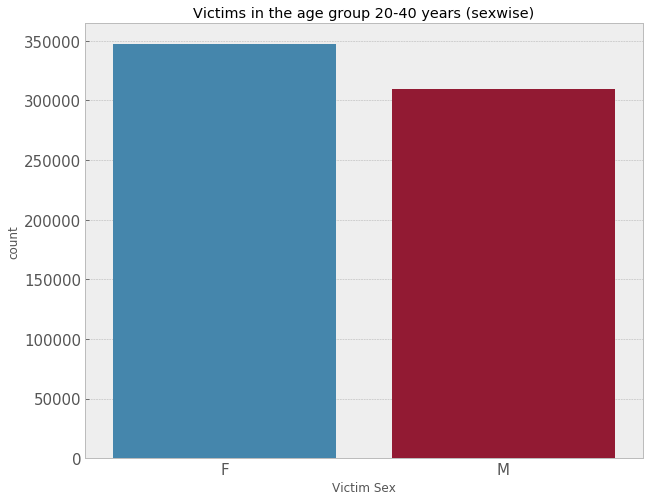

In [22]:
plt.figure(figsize=(10,8))
sns.countplot('Victim Sex', data=df[(df['Victim Age'] >= 20) & (df['Victim Age'] <= 40)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Victims in the age group 20-40 years (sexwise)")
plt.savefig("agegroup(20-40).png",bbox_inches='tight')
plt.show()

### Convert the time of the day into shifts:
    - Day: 7am to 3pm
    - Evening: 3pm to 11pm
    - Night: 11pm to 7am

In [23]:
hour = ["Hour Occurred"]
for i in hour:
    df[i] = df[i].replace(to_replace = ['07','08','09','10','11','12','13','14','15'],
                         value = ["Day","Day","Day","Day","Day","Day","Day","Day","Day"])
    df[i] = df[i].replace(to_replace = ["16","17","18","19","20","21","22","23"],
                         value = ["Evening","Evening","Evening","Evening","Evening","Evening","Evening","Evening"])
    df[i] = df[i].replace(to_replace = ["00","01","02","03","04","05","06"],
                         value = ["Night","Night","Night","Night","Night","Night","Night"])
    

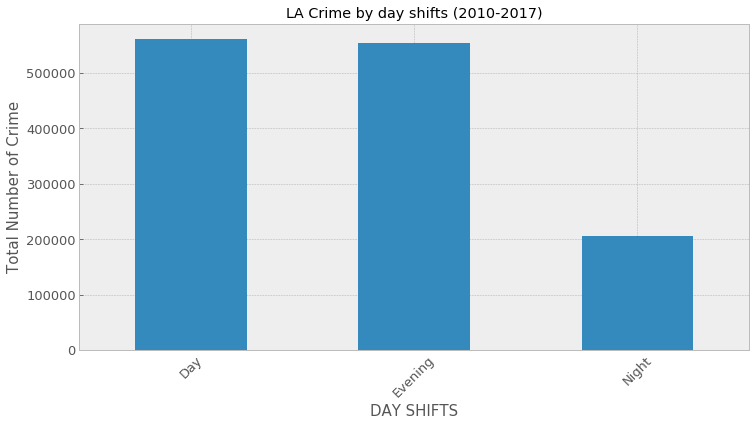

In [24]:
shifts_crime = df["Hour Occurred"].value_counts()
shifts_crime.plot(kind='bar', figsize=(12,6), rot=45)
plt.xlabel("DAY SHIFTS", fontsize = 15)
plt.ylabel("Total Number of Crime", fontsize=15)
plt.title("LA Crime by day shifts (2010-2017)")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("shiftwise.png",bbox_inches='tight')
plt.show()